# 104 二叉树最大深度

给定一个二叉树 root ，返回其最大深度。

二叉树的 最大深度 是指从根节点到最远叶子节点的最长路径上的节点数。

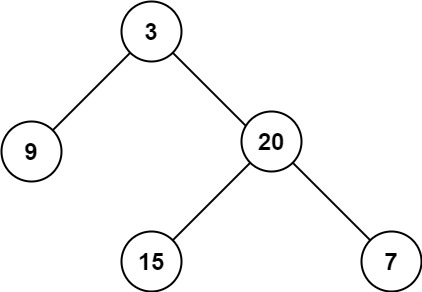

输入：root = [3,9,20,null,null,15,7]
输出：3
示例 2：

输入：root = [1,null,2]
输出：2
 

提示：

树中节点的数量在 [0, 104] 区间内。
-100 <= Node.val <= 100

In [ ]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def maxDepth(root):
        if not root :return 0
        l_depth = maxDepth(root.left)
        r_depth = maxDepth(root.right)
        return max(l_depth,r_depth)+1

root1 = TreeNode(3, TreeNode(9), TreeNode(20, TreeNode(15), TreeNode(7)))
root2 = TreeNode(1, TreeNode(None), TreeNode(2))
maxDepth(root1), maxDepth(root2)

(3, 2)

# 100 相同二叉树

给你两棵二叉树的根节点 p 和 q ，编写一个函数来检验这两棵树是否相同。

如果两个树在结构上相同，并且节点具有相同的值，则认为它们是相同的。

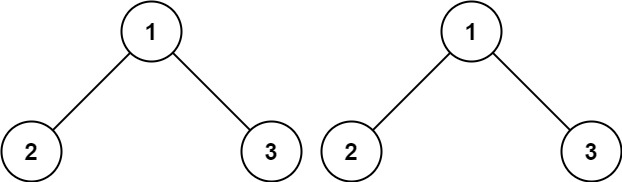

输入：p = [1,2,3], q = [1,2,3]
输出：true

示例 2：

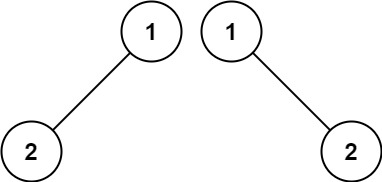

输入：p = [1,2], q = [1,null,2]
输出：false

示例 3：

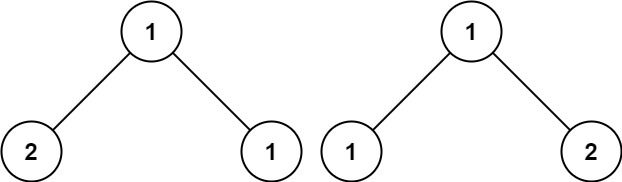

输入：p = [1,2,1], q = [1,1,2]
输出：false
 

提示：

两棵树上的节点数目都在范围 [0, 100] 内
-104 <= Node.val <= 104

 

In [15]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def isSameTree(p, q):
    if not p and not q: return True
    if not p or not q: return False
    return p.val == q.val and isSameTree(p.left,q.left) and isSameTree(p.right,q.right)

p1 = TreeNode(1,TreeNode(2),TreeNode(3))
q1 = TreeNode(1,TreeNode(2),TreeNode(3))

p2 = TreeNode(1,TreeNode(2))
q2 = TreeNode(1,None,TreeNode(2))

isSameTree(p1,q1), isSameTree(p2,q2)

(True, False)

# 101 对称二叉树

给你一个二叉树的根节点 root ， 检查它是否轴对称。

 

示例 1：  
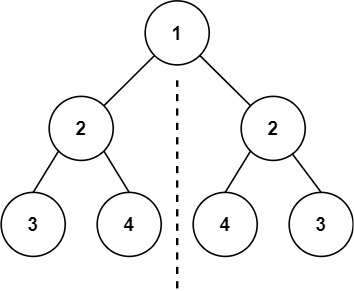

输入：root = [1,2,2,3,4,4,3]
输出：true


示例 2：  
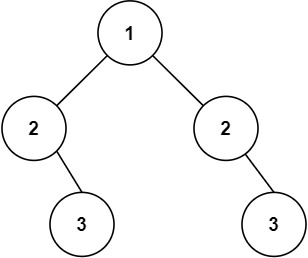

输入：root = [1,2,2,null,3,null,3]
输出：false
 

提示：

树中节点数目在范围 [1, 1000] 内
-100 <= Node.val <= 100
 

进阶：你可以运用递归和迭代两种方法解决这个问题吗？

In [18]:
# 递归方法
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def isSameTree(p, q):
    if not p and not q: return True
    if not p or not q: return False
    return p.val == q.val and isSameTree(p.left,q.right) and isSameTree(p.right,q.left)
def isSymmetric(root) :
        return isSameTree(root.left, root.right)

root =TreeNode(1,TreeNode(2,TreeNode(3),TreeNode(4)), TreeNode(2,TreeNode(4),TreeNode(3))) 
isSymmetric(root)

True

In [19]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right


def isSymmetric(root):
    if not root :return True
        #递归
    def similar(l, r):
        if not l and not r:return True
        if not l or not r or l.val != r.val: return False
        return similar(l.left, r.right) and similar(l.right, r.left)
    
    return similar(root.left, root.right)

root =TreeNode(1,TreeNode(2,TreeNode(3),TreeNode(4)), TreeNode(2,TreeNode(4),TreeNode(3))) 
isSymmetric(root)

True

In [22]:
# bfs 迭代法
import collections
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def isSymmetric(root):
    queue = collections.deque()
    queue.append((root, root))
    while queue:
        left, right = queue.popleft()
        if not left and not right:
            continue
        if not left or not right or left.val != right.val:
            return False
        queue.append((left.left, right.right))
        queue.append((left.right, right.left))
    return True

root =TreeNode(1,TreeNode(2,TreeNode(3),TreeNode(4)), TreeNode(2,TreeNode(4),TreeNode(3))) 
isSymmetric(root)


True

# 110 平衡二叉树

给定一个二叉树，判断它是否是 
平衡二叉树
  

 

示例 1：  
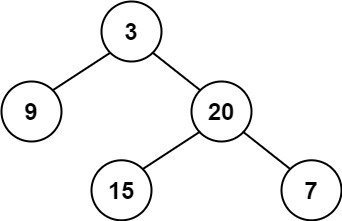


输入：root = [3,9,20,null,null,15,7]
输出：true  
示例 2：  
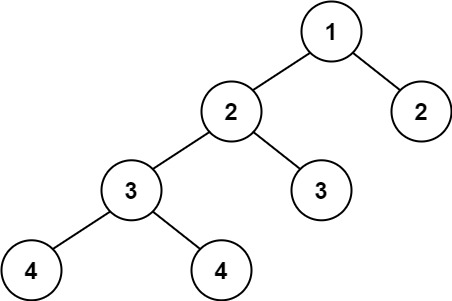


输入：root = [1,2,2,3,3,null,null,4,4]
输出：false  
示例 3：  


输入：root = []
输出：true
 

提示：

树中的节点数在范围 [0, 5000] 内
-104 <= Node.val <= 104

一、基本概念平衡二叉树也叫AVL树，它或者是一颗空树，或者具有以下性质的二叉排序树：它的左子树和左子树的高度之差(平衡因子)的绝对值不超过1，且它的左子树和右子树都是一颗平衡二叉树。

二、结构如基本概念所树，它具有一个左子树和一个右子树，且对于任意一个子树而言，左子树和右子树高度只差不超过1

In [ ]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
#基本功能，不提前减枝
def isBalanced(root):
    def height(node):
        if not node: return 0
        l_height = height(node.left)

        r_height = height(node.right)

        #比较大小
        if abs(l_height - r_height) <= 1: return max(l_height, r_height)+1
        else : return -1
    return height(root) != -1

root = TreeNode(3, TreeNode(9), TreeNode(20, TreeNode(15), TreeNode(7)))
isBalanced(root)



True

In [29]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def isBalanced(root):
    def recur(root):
        if not root :return 0
        l_depth = recur(root.left)
        if l_depth == -1:
            return -1

        r_depth = recur(root.right)
        if r_depth == -1:
            return -1

        if abs(l_depth - r_depth) <= 1:return max(l_depth, r_depth)+1
        else: return -1
    return recur(root) != -1
root = TreeNode(3, TreeNode(9), TreeNode(20, TreeNode(15), TreeNode(7)))
isBalanced(root)

True

# 199.二叉树右视图

给定一个二叉树的 根节点 root，想象自己站在它的右侧，按照从顶部到底部的顺序，返回从右侧所能看到的节点值。

 

示例 1:  

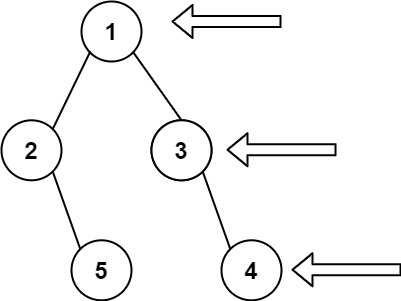

输入: [1,2,3,null,5,null,4]
输出: [1,3,4]  
示例 2:



输入: [1,null,3]
输出: [1,3]  
示例 3:

输入: []
输出: []  
 

提示:

二叉树的节点个数的范围是 [0,100]
-100 <= Node.val <= 100 

In [32]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
    
def right_view(root):
    ans = []
    def dfs(root, depth):
        if not root:return
        if depth == len(ans):
            ans.append(root.val)

        dfs(root.right, depth+1)
        dfs(root.left, depth+1)
    dfs(root, 0)
    return ans

root = TreeNode(3, TreeNode(9), TreeNode(20, TreeNode(15), TreeNode(7)))
right_view(root)

[3, 20, 7]